<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

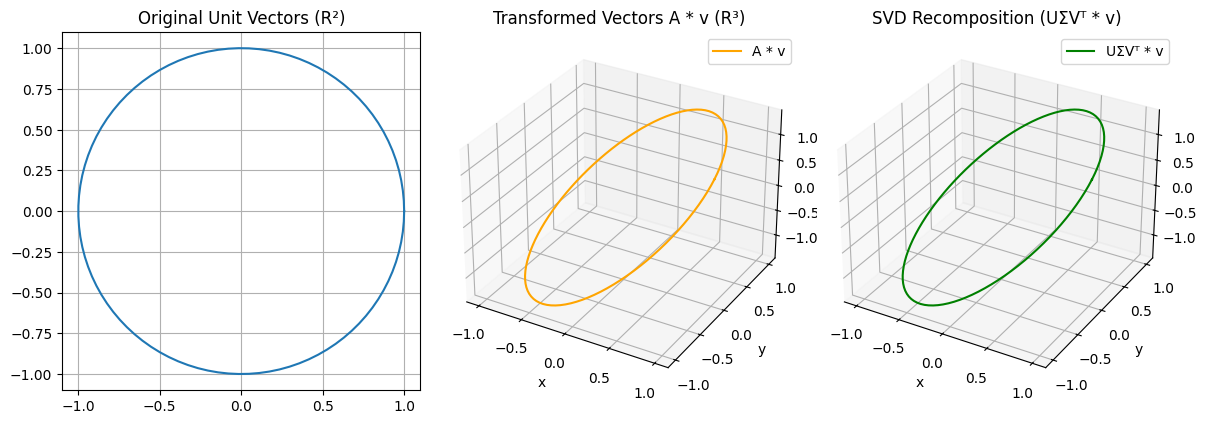

U:
 [[-4.08248290e-01  7.07106781e-01 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01 -5.77350269e-01]
 [-8.16496581e-01 -1.22629285e-16  5.77350269e-01]]

Singular Values (Σ):
 [1.73205081 1.        ]

Vᵀ:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(ax, vectors, color, label=None):
    origin = np.zeros((2, vectors.shape[1]))  # origin for arrows
    ax.quiver(*origin, vectors[0], vectors[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

def visualize_matrix_action(A):
    # Define 100 unit vectors around the unit circle in 2D
    theta = np.linspace(0, 2 * np.pi, 100)
    unit_circle = np.array([np.cos(theta), np.sin(theta)])  # (2, 100)

    # Apply A to the unit circle
    Av = A @ unit_circle  # (3, 100)

    # Compute SVD
    U, S, VT = np.linalg.svd(A)
    V = VT.T
    Sigma = np.zeros_like(A, dtype=float)
    np.fill_diagonal(Sigma, S)

    # Decomposed transformation via SVD
    SVD_transformed = U @ Sigma @ V.T @ unit_circle

    # Plotting
    fig = plt.figure(figsize=(12, 4))

    # Plot 1: Unit circle in R²
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(unit_circle[0], unit_circle[1], label='Unit Circle')
    ax1.set_title('Original Unit Vectors (R²)')
    ax1.set_aspect('equal')
    ax1.grid(True)

    # Plot 2: A @ unit_circle in R³
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.plot(Av[0], Av[1], Av[2], color='orange', label='A * v')
    ax2.set_title('Transformed Vectors A * v (R³)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.legend()

    # Plot 3: UΣVᵀ @ unit_circle
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.plot(SVD_transformed[0], SVD_transformed[1], SVD_transformed[2], color='green', label='UΣVᵀ * v')
    ax3.set_title('SVD Recomposition (UΣVᵀ * v)')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    ax3.legend()

    plt.tight_layout()
    plt.show()

    # Print matrices
    print("U:\n", U)
    print("\nSingular Values (Σ):\n", S)
    print("\nVᵀ:\n", VT)

# Define matrix A
A = np.array([[1, 0],
              [0, 1],
              [1, 1]])

visualize_matrix_action(A)
